# Using `pandas` with `dataframe-haystack`

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/EdAbati/dataframes-haystack/blob/main/notebooks/pandas-example.ipynb)


In [1]:
# when running in Google Colab (or similar), install the following packages
# !pip install dataframe-haystack arxiv

In [2]:
import pandas as pd

## Downloading the dataset

We are using a dataset that contains abstracts of papers uploaded on arXiv. We are using the arXiv API to get the data.

In [3]:
def get_arxiv_data(search_query: str, max_num_rows: int = 10) -> pd.DataFrame:
    """Get data using the arXiv API."""
    import arxiv

    arxiv_client = arxiv.Client()

    search = arxiv.Search(query=search_query, max_results=max_num_rows, sort_by=arxiv.SortCriterion.Relevance)
    results_list = [
        {
            "title": result.title,
            "authors": [author.name for author in result.authors],
            "summary": result.summary,
            "published": result.published,
            "primary_category": result.primary_category,
            "categories": result.categories,
            "pdf_url": result.pdf_url,
            "entry_id": result.entry_id,
        }
        for result in arxiv_client.results(search)
    ]
    return pd.DataFrame(results_list)

We will have a dataset of 10 rows with papers about LLMs.

In [4]:
df = get_arxiv_data("llm", max_num_rows=10)
df.head()

,title,authors,summary,published,primary_category,categories,pdf_url,entry_id
0,A Survey of Large Language Models for Code: Ev...,"[Zibin Zheng, Kaiwen Ning, Yanlin Wang, Jingwe...","General large language models (LLMs), represen...",2023-11-17 07:55:16+00:00,cs.SE,[cs.SE],http://arxiv.org/pdf/2311.10372v2,http://arxiv.org/abs/2311.10372v2
1,TEST: Text Prototype Aligned Embedding to Acti...,"[Chenxi Sun, Hongyan Li, Yaliang Li, Shenda Hong]",This work summarizes two ways to accomplish Ti...,2023-08-16 09:16:02+00:00,cs.CL,"[cs.CL, cs.AI]",http://arxiv.org/pdf/2308.08241v2,http://arxiv.org/abs/2308.08241v2
2,Benchmarking LLMs via Uncertainty Quantification,"[Fanghua Ye, Mingming Yang, Jianhui Pang, Long...",The proliferation of open-source Large Languag...,2024-01-23 14:29:17+00:00,cs.CL,[cs.CL],http://arxiv.org/pdf/2401.12794v1,http://arxiv.org/abs/2401.12794v1
3,Is LLM-as-a-Judge Robust? Investigating Univer...,"[Vyas Raina, Adian Liusie, Mark Gales]",Large Language Models (LLMs) are powerful zero...,2024-02-21 18:55:20+00:00,cs.CL,[cs.CL],http://arxiv.org/pdf/2402.14016v1,http://arxiv.org/abs/2402.14016v1
4,MEGAnno+: A Human-LLM Collaborative Annotation...,"[Hannah Kim, Kushan Mitra, Rafael Li Chen, Saj...",Large language models (LLMs) can label data fa...,2024-02-28 04:58:07+00:00,cs.CL,"[cs.CL, cs.HC]",http://arxiv.org/pdf/2402.18050v1,http://arxiv.org/abs/2402.18050v1


## Loading the data in `haystack`

In [5]:
from dataframes_haystack.components.converters.pandas import PandasDataFrameConverter

In [6]:
pandas_converter = PandasDataFrameConverter(
    content_column="summary",
    meta_columns=["title", "authors", "published", "primary_category", "categories", "pdf_url"],
)

In [7]:
pandas_converter.run(dataframe=df)

{'documents': [Document(id=e5345d1a494ff02e70e539ea512e5051fdb9444b74fb4a341bcc5536ea1bbedd, content: 'General large language models (LLMs), represented by ChatGPT, have
  demonstrated significant potentia...', meta: {'title': 'A Survey of Large Language Models for Code: Evolution, Benchmarking, and Future Trends', 'authors': ['Zibin Zheng', 'Kaiwen Ning', 'Yanlin Wang', 'Jingwen Zhang', 'Dewu Zheng', 'Mingxi Ye', 'Jiachi Chen'], 'published': Timestamp('2023-11-17 07:55:16+0000', tz='UTC'), 'primary_category': 'cs.SE', 'categories': ['cs.SE'], 'pdf_url': 'http://arxiv.org/pdf/2311.10372v2'}),
  Document(id=eb043b305efedf30bfb8a566ad615deb77408e8b13edd315a27e6680f1c060b7, content: 'This work summarizes two ways to accomplish Time-Series (TS) tasks in today's
  Large Language Model (...', meta: {'title': "TEST: Text Prototype Aligned Embedding to Activate LLM's Ability for Time Series", 'authors': ['Chenxi Sun', 'Hongyan Li', 'Yaliang Li', 'Shenda Hong'], 'published': Timestamp('2023-08-

If we want to use the dataframe index as unique identifier for documents, we can set the `use_index_as_id` parameter.

In [8]:
pandas_converter = PandasDataFrameConverter(
    content_column="summary",
    meta_columns=["title", "authors", "published", "primary_category", "categories", "pdf_url"],
    use_index_as_id=True,
)
pandas_converter.run(dataframe=df)

{'documents': [Document(id=0, content: 'General large language models (LLMs), represented by ChatGPT, have
  demonstrated significant potentia...', meta: {'title': 'A Survey of Large Language Models for Code: Evolution, Benchmarking, and Future Trends', 'authors': ['Zibin Zheng', 'Kaiwen Ning', 'Yanlin Wang', 'Jingwen Zhang', 'Dewu Zheng', 'Mingxi Ye', 'Jiachi Chen'], 'published': Timestamp('2023-11-17 07:55:16+0000', tz='UTC'), 'primary_category': 'cs.SE', 'categories': ['cs.SE'], 'pdf_url': 'http://arxiv.org/pdf/2311.10372v2'}),
  Document(id=1, content: 'This work summarizes two ways to accomplish Time-Series (TS) tasks in today's
  Large Language Model (...', meta: {'title': "TEST: Text Prototype Aligned Embedding to Activate LLM's Ability for Time Series", 'authors': ['Chenxi Sun', 'Hongyan Li', 'Yaliang Li', 'Shenda Hong'], 'published': Timestamp('2023-08-16 09:16:02+0000', tz='UTC'), 'primary_category': 'cs.CL', 'categories': ['cs.CL', 'cs.AI'], 'pdf_url': 'http://arxiv.org/pdf/

### Using the `PandasDataFrameConverter` in a pipeline

In [9]:
from haystack import Pipeline
from haystack.components.writers import DocumentWriter
from haystack.document_stores.in_memory import InMemoryDocumentStore

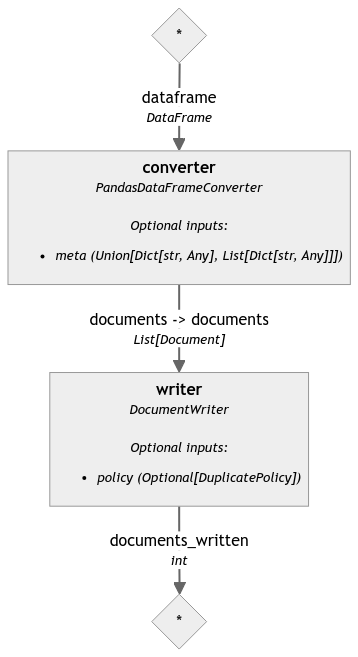

In [10]:
document_store = InMemoryDocumentStore()

indexing = Pipeline()
indexing.add_component(
    "converter",
    PandasDataFrameConverter(
        content_column="summary",
        meta_columns=["title", "authors", "published", "primary_category", "categories", "pdf_url"],
    ),
)
indexing.add_component("writer", DocumentWriter(document_store))
indexing.connect("converter", "writer")
indexing.show()

In [11]:
indexing.run({"converter": {"dataframe": df}})

{'writer': {'documents_written': 10}}